# Erin Rumelhart - Fitting Data

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy.table import QTable

from scipy.optimize import curve_fit

# Power on the Moon

<img src="images/ApolloRTG.jpg" alt="Apollo_ALSEP_RTG" style="width: 500px;"/>

The Apollo lunar mission deployed a series of experiments on the Moon, The experiment package
was called the Apollo Lunar Surface Experiments Package (ALSEP). The ALSEP was powered by a radioisotope 
thermoelectric generator (RTG). 

An RTG is basically a fist-sized
slug of Pu-238 wrapped in a material that generates electric power when heated. Since the RTG is powered
by a radioisotope, the output power decreases over time as the radioisotope decays.

## Read in the datafile

The data file `Apollo_RTG.csv` contains the power output of the Apollo 12 RTG as a function of time.

The data columns are

* [Day] - Days on the Moon
* [Power] - RTG power output in Watts

In [25]:
rtg_table = QTable.read('C:/Users/Erin/Documents/Astro300-A17/Apollo_RTG.csv', format='ascii.csv')
rtg_table[0:2]

Day,Power
float64,float64
34.4342,73.786264082
151.303,73.4543115789


## Can you charge your phone with the Apollo RTG?

* Plot the data: Day vs. Power
* Use the OO interface to matplotlib
* Fit the function with a polynomial (you choose the degree).
* Plot the fit with the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

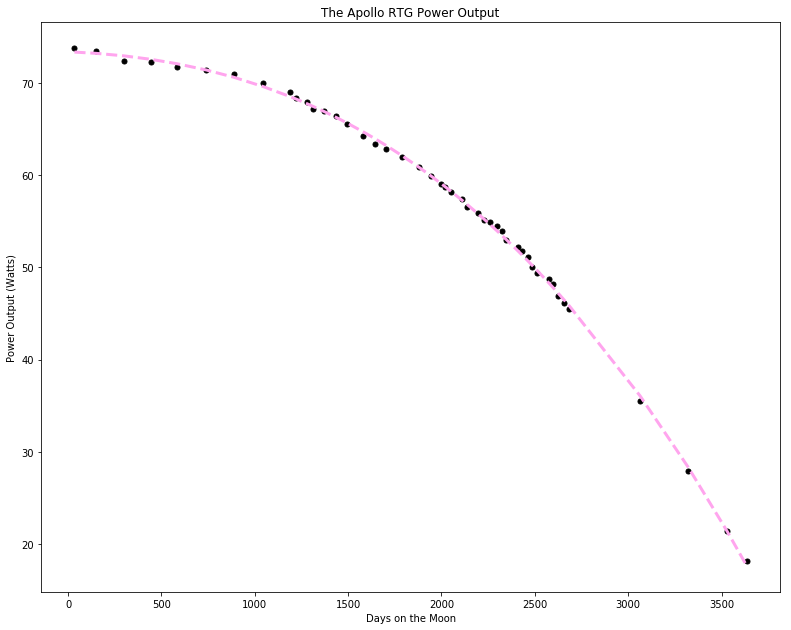

In [52]:
fitline = np.polyfit(rtg_table['Day'],rtg_table['Power'],3)
yfit = np.polyval(fitline,rtg_table['Day'])

fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

ax.set_xlabel("Days on the Moon")
ax.set_ylabel("Power Output (Watts)")
ax.set_title("The Apollo RTG Power Output")

ax.plot(rtg_table['Day'],rtg_table['Power'],marker="o", color='k', linestyle="None",markersize=5);
ax.plot(rtg_table['Day'], yfit, linewidth=3, color='#ffa5ee', linestyle='--');

## What was the power output on Day 0?

In [53]:
poly_data = np.poly1d(fitline)
day_zero = poly_data(0)

print("The power output on Day 0 is {0:.2f} watts.".format(day_zero))

The power output on Day 0 is 73.40 watts.


## How many years after landing could you still power a 60 W lightbulb?

In [61]:
sixty_watt = (poly_data - 60).roots

print("The Apollo RTG could power a 60 W lightbulb {0:.2f} years after landing.".format((sixty_watt[2].real / 365)))



The Apollo RTG could power a 60 W lightbulb 5.31 years after landing.


## How many years after landing could you still power a 5 W USB device?

In [62]:
five_watt = (poly_data - 5).roots

print("The Apollo RTG could power a 5 W USB device {0:.2f} years after landing.".format((five_watt[2].real / 365)))

The Apollo RTG could power a 5 W USB device 10.85 years after landing.


## How many years after landing until the power output is 0 W?

In [64]:
zero_watt = poly_data.roots

print("The Apollo RTG power output reached 0 W after {0:.2f} years.".format(zero_watt[2].real / 365))

The Apollo RTG power output reached 0 W after 11.17 years.


---

# Fitting data to a function

* The datafile 'FitMe.dat' contains two columns of data (x,y)
* Use the OO interface to matplotlib
* Plot the data x,y
* Fit the function below to the data
* Find the values of a,b,c that best fit the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

$$\Large f(x) = a \sin(bx) \ e^{-cx} $$

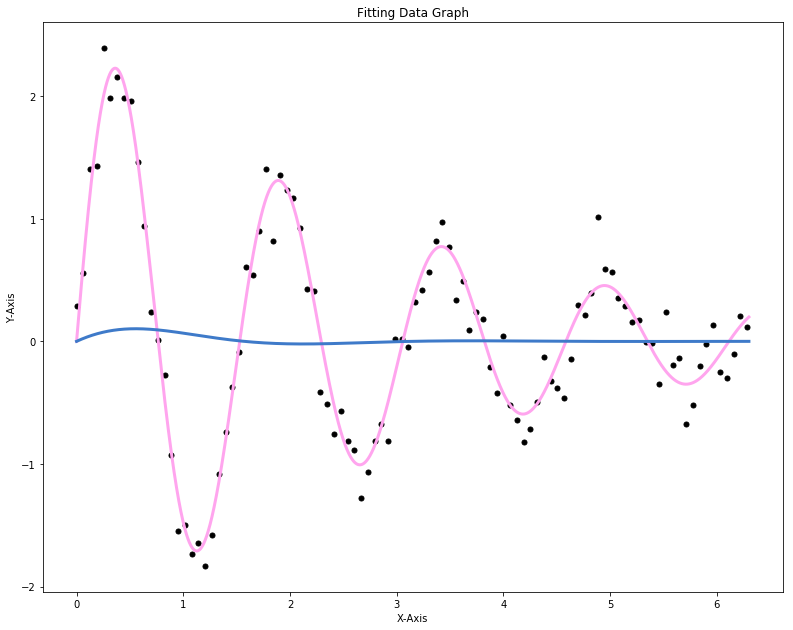

In [100]:
fitdat = QTable.read('C:/Users/Erin/Documents/Astro300-A17/FitMe.csv', format='ascii.csv')

fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_title("Fitting Data Graph")

ax.plot(fitdat['x'],fitdat['y'],marker="o",linestyle="None",color='k',markersize=5);

def curvefit(x,a,b,c):
    return a*np.sin(b*x)*np.e**(-c*x)

Aguess = 0.2
Bguess = 2
Cguess = 1

fitpars, error = curve_fit(curvefit,fitdat['x'],fitdat['y'],p0=[Aguess,Bguess,Cguess])

Z = np.linspace(0,6.3,10000)

ax.plot(Z, curvefit(Z, *fitpars),color='#ffa5ee', linestyle='-', linewidth=3);
ax.plot(Z, curvefit(Z,Aguess,Bguess,Cguess), color='#3e7ac9', linestyle='-', linewidth='3');

### Due Tue Nov 07 - 5pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`  